In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [21]:
#op = pd.read_csv('order_products__train.csv')
#opp = pd.read_csv('order_products__prior.zip')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
tips_tr = pd.read_csv('tip_trainingsdaten.csv')
tips_te = pd.read_csv('tip_testdaten.csv')

In [22]:
tips_tr.head(5)

,Unnamed: 0,order_id,tip
0,0,2539329,1
1,1,2398795,1
2,2,473747,1
3,3,2254736,1
4,4,431534,1


In [23]:
tips_te.head()

,Unnamed: 0,order_id,tip
0,10,1187899,NaN
1,25,1492625,NaN
2,49,2196797,NaN
3,74,525192,NaN
4,78,880375,NaN


In [24]:
tips_tr = tips_tr.drop('Unnamed: 0', axis=1) # Die unnötige Spalte 'Unamed:0' entfernen
tips_te = tips_te.drop('Unnamed: 0', axis=1) # Die unnötige Spalte 'Unamed:0' entfernen

In [25]:
tips_te.head()

,order_id,tip
0,1187899,NaN
1,1492625,NaN
2,2196797,NaN
3,525192,NaN
4,880375,NaN


In [26]:

tips_tr.head()

,order_id,tip
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1


In [27]:
instacart_train = tips_tr.merge(orders)
instacart_train.head()

,order_id,tip,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,prior,1,2,8,NaN
1,2398795,1,1,prior,2,3,7,15.0
2,473747,1,1,prior,3,3,12,21.0
3,2254736,1,1,prior,4,4,7,29.0
4,431534,1,1,prior,5,4,15,28.0


In [28]:
instacart_train.eval_set.value_counts()

prior    3214874
Name: eval_set, dtype: int64

In [29]:
instacart_test = tips_te.merge(orders)
instacart_test.head()

,order_id,tip,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1187899,NaN,1,train,11,4,8,14.0
1,1492625,NaN,2,train,15,1,11,30.0
2,2196797,NaN,5,train,5,0,11,6.0
3,525192,NaN,7,train,21,2,11,6.0
4,880375,NaN,8,train,4,1,14,10.0


In [30]:
instacart_test.eval_set.value_counts()

train    131209
Name: eval_set, dtype: int64

In [31]:
instacart_test['days_since_prior_order'].isna().sum()


0

# Busines Understanding

In der Aufgaben geht es um einen Lieferdienst namens Instacart, bei dem Kunden Bestellungen aufgeben
können. Instacart schickt dann Fahrer los , die die Ware in
Supermärkten abholen und zum Kunden bringen. 
<br>
Dieser Datensatz enthält eine zusätzliche Spalte „Tip“, die zu den einzelnen
Bestellungen angibt, ob der Kunden beim Erhalt der Ware ein Trinkgeld gegeben hat oder nicht. Kern
der Aufgabe ist vorherzusagen, bei welchen Bestellungen Trinkgeld gegeben werden wird und bei
welchen nicht. 

### 1. Tip-Prediction
Es soll vorhergesagt werden, bei welchen Bestellungen die Kunden dem Fahrer Trinkgeld
gegeben werden und bei welchen nicht. Die Vorhersage kann dabei auf allen Informationen
basieren, die unmittelbar nach Aufgeben der Bestellung zur Verfügung stehen, d.h. alle
Daten zur aktuellen Bestellung sowie die gesamte Vorgeschichte. 
Zielerwartung sind mindestens 70% Genauigkeit bei der Vorhersage, ob ein Tip erfolgen wird oder nicht.

### 2. Analyse der Tip-Einflussfaktoren
Zusätzlich sollen auch interpretierbare Erkenntnisse geliefert werden, wovon es abhängt, ob
Trinkgeld gegeben wird. Diese sollen nachvollziehbar dargestellt werden. 

# Data Understanding

## Daten sammeln

- To-Do: Verknüpfung weiterer Daten zu den Bestellungen über Order-Products

## Beschreibung der Daten

- To-Do: Textuelle Beschreibung der Spalten

In [33]:
instacart_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 0 to 3214873
Data columns (total 8 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   tip                     int8    
 2   user_id                 int32   
 3   eval_set                category
 4   order_number            int8    
 5   order_dow               int8    
 6   order_hour_of_day       int8    
 7   days_since_prior_order  float16 
dtypes: category(1), float16(1), int32(2), int8(4)
memory usage: 70.5 MB


## Daten verstehen

- ToDo: Verteilungen auswerten
- ToDo: Korrellationen auswerten

- Weitere Fragestellungen
    - DOW zu Tip
    - Uhrzeit zu Tip
    - Days since prior order zu Tip
    - Order Number zu Tip
    - Departments zu Tip
    - Aisles zu Tip
    - Anzahl Produkte in der Bestellung zu Tip
    - Top Nutzer nach Tip, Neg Nutzer nach Tip
    - Products zu Tip (Top 20?, Neg 20?)

In [34]:
print(instacart_train.describe())
instacart_train.head(10)

           order_id           tip       user_id  order_number     order_dow  \
count  3.214874e+06  3.214874e+06  3.214874e+06  3.214874e+06  3.214874e+06   
mean   1.710827e+06  4.217627e-01  1.029701e+05  1.719107e+01  2.776364e+00   
std    9.875206e+05  4.938411e-01  5.953411e+04  1.779950e+01  2.041806e+00   
min    2.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.556832e+05  0.000000e+00  5.138500e+04  5.000000e+00  1.000000e+00   
50%    1.711120e+06  0.000000e+00  1.026620e+05  1.100000e+01  3.000000e+00   
75%    2.566034e+06  1.000000e+00  1.543720e+05  2.400000e+01  5.000000e+00   
max    3.421083e+06  1.000000e+00  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.214874e+06               3008665.0  
mean        1.344347e+01                     NaN  
std         4.226246e+00                     0.0  
min         0.000000e+00                     0.0  
25%         1.000000e+01         

,order_id,tip,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,prior,1,2,8,NaN
1,2398795,1,1,prior,2,3,7,15.0
2,473747,1,1,prior,3,3,12,21.0
3,2254736,1,1,prior,4,4,7,29.0
4,431534,1,1,prior,5,4,15,28.0
5,3367565,1,1,prior,6,2,7,19.0
6,550135,1,1,prior,7,1,9,20.0
7,3108588,1,1,prior,8,1,14,14.0
8,2295261,1,1,prior,9,1,16,0.0
9,2550362,1,1,prior,10,4,8,30.0


## Datenqualität analysieren

- ToDo: Outlier auswerten und behandeln
- ToDo: Missing values auswerten und behandeln

## Optimierung der Datentypen

In [32]:
''' 
    iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
'''
def reduce_mem_usage(train_data):
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train_data.columns:
        col_type = train_data[col].dtype
        
        if col_type not in [object]:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')
    end_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data

instacart_train = reduce_mem_usage(instacart_train)

# 

Memory usage of dataframe is 220.75 MB
Memory usage after optimization is: 70.52 MB
Decreased by 68.1%


## Beschreibung der Zusammenhänge

In [ ]:
# DOW zu TIP
# Uhrzeit zu TIP
# Days since prior order zu TIP
# Order Number zu TIP
# Departments zu TIP
# Aisles zu TIP
# Anzahl Produkte in der Bestellung zu TIP

# Top Nutzer nach TIP, Neg Nutzer nach TIP

# Products zu TIP (Top 20?, Neg 20?)

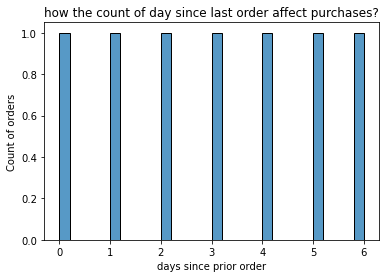

In [41]:
instacart_train.groupby(['order_dow']).agg({'tip':'mean'})

# Histogram for days passed before last order
sns.histplot(data=instacart_train.groupby(['order_dow']).agg({'tip':'mean'}), x='order_dow', bins=30)
plt.xlabel('days since prior order')
plt.ylabel('Count of orders')
plt.title('how the count of day since last order affect purchases?')
plt.show()

- Outlier Detection
- Missing vlaues
    - days_since_prior_oder: Null-Werte behandeln

# Data Preparation

- Feature Engineering
    - Trinkgeld bei der letzten Bestellung
    - Durchschnitt für User
    - Anzahl der Produkte pro Bestellung

- Feature Selection
    - chi2
    - f-Value
    - eval_set: Löschen, da kein Zusammenhang mit Zielvariable

- Encoding

# Modeling

# Evaluation